In [1]:
import pandas as pd
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_rss
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from pyscenic.binarization import binarize

In [2]:
df_meta = pd.read_csv('../../processed_data/clean_data/metadata.csv', index_col = 0)

In [3]:
rss_celltype = pd.read_csv('output/rss_celltype.csv', index_col = 0)

In [5]:
celltype = [i for i in rss_celltype.index]
celltype[celltype.index('MΦ')] = 'Mo'
celltype[celltype.index('SC')] = 'Mes'
celltype[celltype.index('Peri')] = 'Peri1'
celltype[celltype.index('vSMC')] = 'Peri2'
celltype[celltype.index('Ast3')] = 'Ep'
celltype[celltype.index('T.NK')] = 'LM'

In [6]:
rss_celltype.index = celltype

In [7]:
rss_celltype

,ALX4(+),ARID5B(+),ARX(+),ASCL1(+),ATF3(+),ATF5(+),BACH1(+),BCL6(+),BHLHE40(+),BHLHE41(+),...,TFCP2L1(+),TP63(+),TP73(+),VSX1(+),XBP1(+),ZEB1(+),ZFHX3(+),ZIC2(+),ZMAT4(+),ZNF536(+)
Oli,0.290093,0.379918,0.377723,0.329584,0.478449,0.389148,0.301248,0.371475,0.381857,0.427550,...,0.338684,0.213670,0.323159,0.319241,0.409102,0.359977,0.415002,0.308502,0.337867,0.684308
Mes,0.422740,0.267612,0.223890,0.223866,0.290540,0.255165,0.265512,0.275050,0.308142,0.247847,...,0.269136,0.317659,0.217305,0.215379,0.317743,0.244729,0.234434,0.316747,0.209287,0.195622
End,0.212526,0.239031,0.204993,0.194867,0.260164,0.236247,0.205279,0.226598,0.265899,0.211495,...,0.229505,0.174548,0.188291,0.177042,0.246486,0.222155,0.198343,0.215007,0.193119,0.186803
Epi,0.251846,0.357388,0.240209,0.195042,0.231698,0.212823,0.205550,0.236857,0.324524,0.244139,...,0.397112,0.176107,0.418926,0.194672,0.314281,0.238206,0.230794,0.241010,0.207771,0.188505
Ex,0.191726,0.282855,0.288835,0.356616,0.218572,0.188083,0.180371,0.246665,0.244028,0.204849,...,0.264162,0.177498,0.211241,0.226406,0.227908,0.408852,0.347054,0.214154,0.484384,0.197496
In,0.193049,0.227321,0.352894,0.270759,0.201255,0.181379,0.223890,0.220540,0.195085,0.190985,...,0.220270,0.171794,0.197049,0.229573,0.200467,0.266092,0.230882,0.197248,0.307600,0.221491
Mo,0.171270,0.195440,0.183148,0.176175,0.199637,0.246660,0.258396,0.188864,0.194863,0.213551,...,0.194232,0.172655,0.180825,0.176525,0.198894,0.186522,0.184019,0.180061,0.178422,0.178472
Ast1,0.219779,0.204969,0.243166,0.221070,0.213056,0.175588,0.173535,0.320388,0.203827,0.225355,...,0.236820,0.169160,0.182830,0.252632,0.205886,0.228016,0.248775,0.267377,0.216549,0.188856
Ast2,0.235865,0.212614,0.241010,0.231391,0.230069,0.204381,0.186276,0.290799,0.225430,0.225739,...,0.232663,0.185747,0.217750,0.254776,0.224497,0.223053,0.233707,0.268245,0.211831,0.194477
Opc,0.195650,0.195203,0.244437,0.384061,0.190619,0.179870,0.232755,0.225376,0.184570,0.191518,...,0.206581,0.171220,0.187683,0.435715,0.190380,0.231941,0.216254,0.200724,0.234464,0.198783


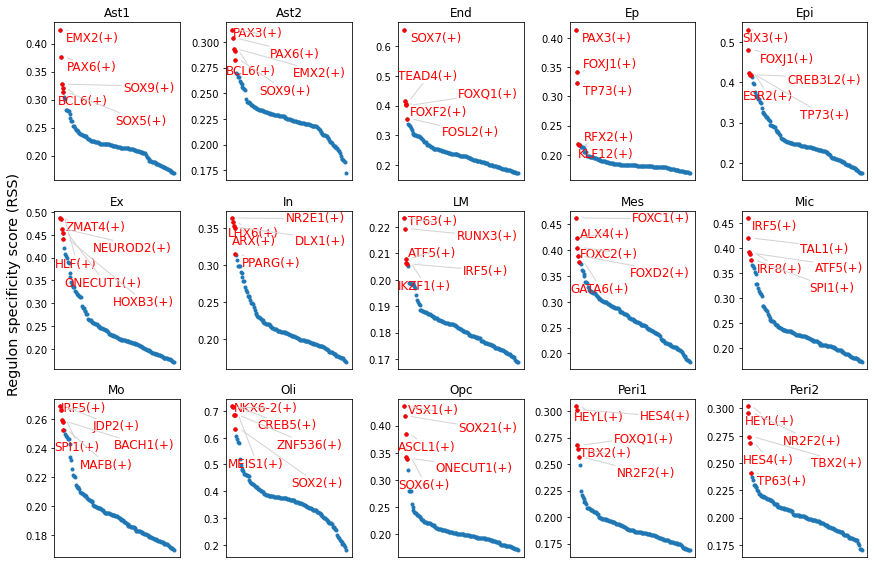

In [9]:
cats = sorted(list(set(rss_celltype.index) ))

fig = plt.figure(figsize=(12, 8))
for c,num in zip(cats, range(1,len(cats)+1)):
    x = rss_celltype.T[c]
    ax = fig.add_subplot(3,5,num)
    plot_rss(rss_celltype, c, top_n=5, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_xticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )

#fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')

plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })

plt.savefig("../../figs/scenic_celltype_specific_tf.pdf", dpi=600, bbox_inches = "tight")
plt.savefig("../../figs/png/scenic_celltype_specific_tf.png", dpi=600, bbox_inches = "tight")
plt.show()

In [9]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend([(c, t) for t in rss_celltype.T[c].sort_values(ascending=False)[:5].index])
topreg = sorted(set(topreg))

In [10]:
pd.DataFrame(topreg, columns = ['celltype', 'TF']).to_csv('output/topTFs.csv', index = False)

In [11]:
topreg

[('Ast1', 'BCL6(+)'),
 ('Ast1', 'EMX2(+)'),
 ('Ast1', 'PAX6(+)'),
 ('Ast1', 'SOX5(+)'),
 ('Ast1', 'SOX9(+)'),
 ('Ast2', 'BCL6(+)'),
 ('Ast2', 'EMX2(+)'),
 ('Ast2', 'PAX3(+)'),
 ('Ast2', 'PAX6(+)'),
 ('Ast2', 'SOX9(+)'),
 ('End', 'FOSL2(+)'),
 ('End', 'FOXF2(+)'),
 ('End', 'FOXQ1(+)'),
 ('End', 'SOX7(+)'),
 ('End', 'TEAD4(+)'),
 ('Ep', 'FOXJ1(+)'),
 ('Ep', 'KLF12(+)'),
 ('Ep', 'PAX3(+)'),
 ('Ep', 'RFX2(+)'),
 ('Ep', 'TP73(+)'),
 ('Epi', 'CREB3L2(+)'),
 ('Epi', 'ESR2(+)'),
 ('Epi', 'FOXJ1(+)'),
 ('Epi', 'SIX3(+)'),
 ('Epi', 'TP73(+)'),
 ('Ex', 'HLF(+)'),
 ('Ex', 'HOXB3(+)'),
 ('Ex', 'NEUROD2(+)'),
 ('Ex', 'ONECUT1(+)'),
 ('Ex', 'ZMAT4(+)'),
 ('In', 'ARX(+)'),
 ('In', 'DLX1(+)'),
 ('In', 'LHX6(+)'),
 ('In', 'NR2E1(+)'),
 ('In', 'PPARG(+)'),
 ('LM', 'ATF5(+)'),
 ('LM', 'IKZF1(+)'),
 ('LM', 'IRF5(+)'),
 ('LM', 'RUNX3(+)'),
 ('LM', 'TP63(+)'),
 ('Mes', 'ALX4(+)'),
 ('Mes', 'FOXC1(+)'),
 ('Mes', 'FOXC2(+)'),
 ('Mes', 'FOXD2(+)'),
 ('Mes', 'GATA6(+)'),
 ('Mic', 'ATF5(+)'),
 ('Mic', 'IRF5(+)'),